In [530]:
import nltk
from nltk.corpus import names
from nltk.tokenize import word_tokenize
import spacy

In [531]:
names.words()[:10]

['Abagael',
 'Abagail',
 'Abbe',
 'Abbey',
 'Abbi',
 'Abbie',
 'Abby',
 'Abigael',
 'Abigail',
 'Abigale']

In [532]:
len(names.words())

7944

In [533]:
sent = '''I am reading a book.
It is Python Machine Learning By Example,
3rd edition.'''
word_tokenize(sent)

['I',
 'am',
 'reading',
 'a',
 'book',
 '.',
 'It',
 'is',
 'Python',
 'Machine',
 'Learning',
 'By',
 'Example',
 ',',
 '3rd',
 'edition',
 '.']

In [534]:
sent2 = 'I have been to U.K. and U.S.A.'

In [535]:
word_tokenize(sent2)

['I', 'have', 'been', 'to', 'U.K.', 'and', 'U.S.A', '.']

In [536]:
nlp = spacy.load('en_core_web_sm')

In [537]:
tokensSpacy = nlp(sent2)

In [538]:
[token.text for token in tokensSpacy]

['I', 'have', 'been', 'to', 'U.K.', 'and', 'U.S.A.']

# PoS

In [539]:
tokens = word_tokenize(sent)
nltk.pos_tag(tokens)

[('I', 'PRP'),
 ('am', 'VBP'),
 ('reading', 'VBG'),
 ('a', 'DT'),
 ('book', 'NN'),
 ('.', '.'),
 ('It', 'PRP'),
 ('is', 'VBZ'),
 ('Python', 'NNP'),
 ('Machine', 'NNP'),
 ('Learning', 'NNP'),
 ('By', 'IN'),
 ('Example', 'NNP'),
 (',', ','),
 ('3rd', 'CD'),
 ('edition', 'NN'),
 ('.', '.')]

In [540]:
[(token.text, token.pos_) for token in tokensSpacy]

[('I', 'PRON'),
 ('have', 'AUX'),
 ('been', 'AUX'),
 ('to', 'ADP'),
 ('U.K.', 'PROPN'),
 ('and', 'CCONJ'),
 ('U.S.A.', 'PROPN')]

# NER

In [541]:
text = 'The book written by Hayden Liu in 2020 was sold at $30 in America'

In [542]:
tokens3 = nlp(text)

In [543]:
[(token_ent.text, token_ent.label_) for token_ent in tokens3.ents]

[('Hayden Liu', 'PERSON'),
 ('2020', 'DATE'),
 ('30', 'MONEY'),
 ('America', 'GPE')]

# Stemming and lemmatization

In [544]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [545]:
porter_stemmer.stem('machines')

'machin'

In [546]:
porter_stemmer.stem('learning')

'learn'

# Mining the 20 Newsgroups Dataset with Text Analysis Techniques

In [547]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from nltk.stem import WordNetLemmatizer

In [548]:
groups = fetch_20newsgroups()

In [549]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [550]:
groups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [551]:
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

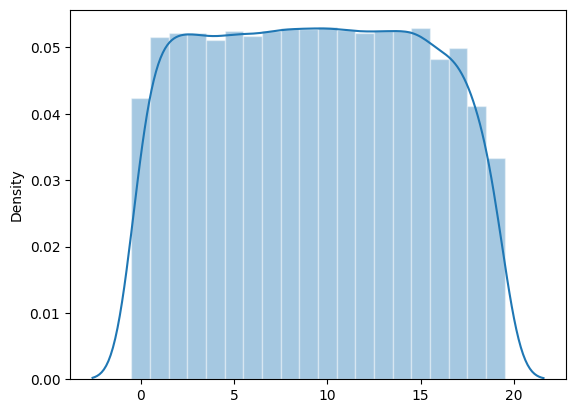

In [552]:
sns.histplot(groups.target, kde=True, stat="density",kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),discrete=True)
plt.show() #uniform distribution

In [553]:
choice = np.random.randint(len(groups.data))
print(groups.data[choice])

From: romdas@uclink.berkeley.edu (Ella I Baff)
Subject: Re: Selective Placebo
Organization: University of California, Berkeley
Lines: 37
Distribution: world
NNTP-Posting-Host: uclink.berkeley.edu

  Ron Roth recommends: "Once you have your hypoglycemia CONFIRMED through the 
                        proper channels, you might consider ther following:..."
                        [diet omitted]

1) Ron...what do YOU consider to be "proper channels"...this sounds suspiciously
like a blood chemistry...glucose tolerance and the like...suddenly chemistry 
exists? You know perfectly well that this person can be saved needless trouble 
and expense with simple muscle testing and hair analysis to diagnose...no
"CONFIRM" any aberrant physiology...but then again...maybe that's what you meantby "proper channels."

2) Were you able to understand Dick King's post that "90% of diseases is not thesame thing as 90% of patients" which was a reply to your inability to critically
evaluate the statistic you 

In [554]:
groups.target[choice], groups.target_names[groups.target[choice]]

(13, 'sci.med')

In [555]:
count_vector = CountVectorizer(max_features=500)

In [556]:
data_count = count_vector.fit_transform(groups.data)

In [557]:
count_vector.get_feature_names_out()

array(['00', '000', '10', '100', '11', '12', '13', '14', '145', '15',
       '16', '17', '18', '19', '1993', '20', '21', '22', '23', '24', '25',
       '26', '27', '30', '32', '34', '40', '50', '93', 'a86', 'able',
       'about', 'above', 'ac', 'access', 'actually', 'address', 'after',
       'again', 'against', 'ago', 'all', 'already', 'also', 'always',
       'am', 'american', 'an', 'and', 'andrew', 'another', 'answer',
       'any', 'anyone', 'anything', 'apple', 'apr', 'april', 'are',
       'armenian', 'around', 'article', 'as', 'ask', 'at', 'au',
       'available', 'away', 'ax', 'b8f', 'back', 'bad', 'based', 'be',
       'because', 'been', 'before', 'being', 'believe', 'best', 'better',
       'between', 'bible', 'big', 'bill', 'bit', 'book', 'both', 'but',
       'buy', 'by', 'ca', 'call', 'called', 'came', 'can', 'canada',
       'cannot', 'car', 'card', 'case', 'cc', 'center', 'change',
       'children', 'chip', 'christian', 'clipper', 'co', 'code', 'color',
       'com', 

In [558]:
def cleaner(data):
    all_names = set(names.words())
    count_vector_sw = CountVectorizer(stop_words="english", max_features=500)
    lemmatizer = WordNetLemmatizer() #lemmatization
    data_cleaned = []
    for doc in data:
        doc = doc.lower()
        doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if word.isalpha() and word not in all_names)
        data_cleaned.append(doc_cleaned)
    data_cleaned_count = count_vector_sw.fit_transform(data_cleaned)
    return data_cleaned_count, count_vector_sw

In [559]:
def cleaner2(data):
    all_names = set(names.words())
    count_vector_sw = CountVectorizer(stop_words="english", max_features=500)
    porter_stemmer = PorterStemmer() #Stemming
    data_cleaned = []
    for doc in data:
        doc = doc.lower()
        doc_cleaned = ' '.join(porter_stemmer.stem(word) for word in doc.split() if word.isalpha() and word not in all_names)
        data_cleaned.append(doc_cleaned)
    data_cleaned_count = count_vector_sw.fit_transform(data_cleaned)
    return data_cleaned_count, count_vector_sw

# TSNE

In [560]:
categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']
groups_3 = fetch_20newsgroups(categories=categories_3)

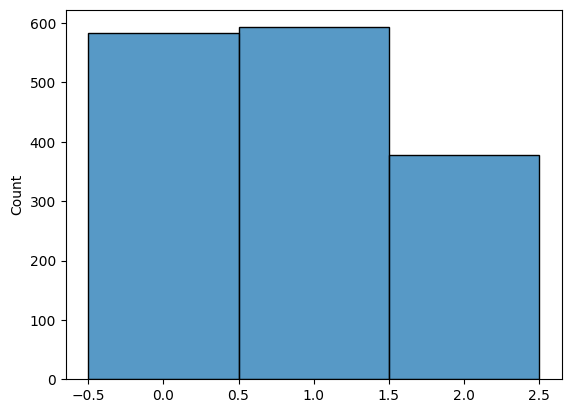

In [561]:
sns.histplot(groups_3.target,discrete=True)
plt.show()

In [562]:
tsne_model = TSNE(n_components=2, perplexity=40, random_state=42, learning_rate=500)

In [563]:
data_cleaned_count_3_lemma, _ = cleaner(groups_3.data)
data_cleaned_count_3_stem, _ = cleaner(groups_3.data)

data_tsne_lemma = tsne_model.fit_transform(data_cleaned_count_3_lemma.toarray())
data_tsne_stem = tsne_model.fit_transform(data_cleaned_count_3_stem.toarray())


In [564]:
def myCleaner(data):
    all_names = set(names.words())
    nlp = spacy.load('en_core_web_sm')
    count_vector_sw = CountVectorizer(stop_words="english", ngram_range=(1,3), max_features=5000)
    exclude = set(['from','subject','organization','lines','distribution','nntp-posting-host','lines','re','xxxx'])
    porter_stemmer = PorterStemmer() #stemming
    data_cleaned = []
    for doc in data:
        doc = doc.lower()
        doc_cleaned = ' '.join(porter_stemmer.stem(word) for word in doc.split() if word.isalpha() and word not in all_names.union(exclude))
        data_cleaned.append(doc_cleaned)
    data_cleaned_count = count_vector_sw.fit_transform(data_cleaned)
    return data_cleaned_count, count_vector_sw

In [565]:
data_cleaned_count_3_mine, cv = myCleaner(groups_3.data)
data_tsne_mine = tsne_model.fit_transform(data_cleaned_count_3_mine.toarray())

In [566]:
cv.get_feature_names_out()

array(['ab', 'abandon', 'abc', ..., 'zoolog kipl', 'zoom', 'zoroastrian'],
      dtype=object)

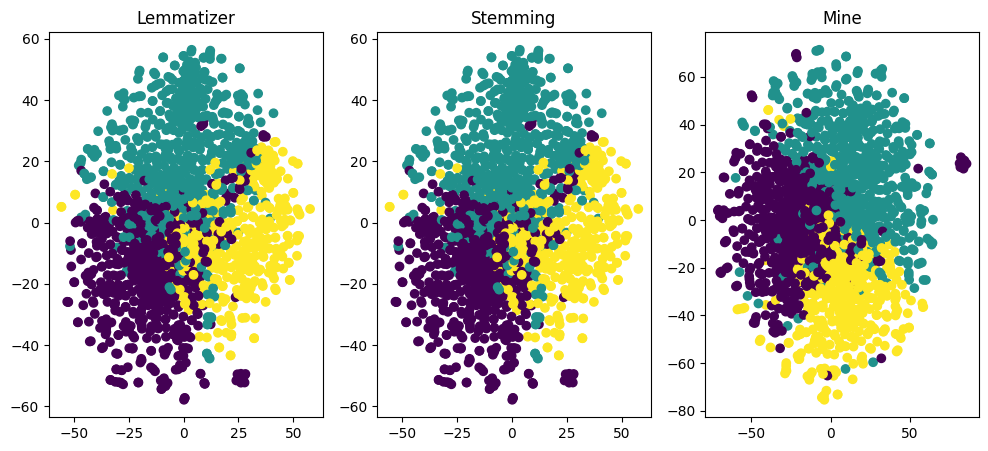

In [567]:
fig, axs = plt.subplots(1,3, figsize=(12,5))

axs[0].scatter(data_tsne_lemma[:, 0], data_tsne_lemma[:, 1], c=groups_3.target)
axs[0].set_title('Lemmatizer')

axs[1].scatter(data_tsne_stem[:, 0], data_tsne_stem[:, 1], c=groups_3.target)
axs[1].set_title('Stemming')

axs[2].scatter(data_tsne_mine[:, 0], data_tsne_mine[:, 1], c=groups_3.target)
axs[2].set_title('Mine')

plt.show()